<a href="https://colab.research.google.com/github/AmoolyaS/Machine_Learning_mini_projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Loading Data

In [ ]:
data=pd.read_csv("/content/creditcard.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
data=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

In [ ]:
#data=data.dropna()
data.isnull().sum().sum()

0

This dataset is higlhly imbalanced. Label 0 - Legit Transactions and Label 1 - Fraudulent Transactions

In [ ]:
#data.groupby("Class")["Class"].count()
data["Class"].value_counts()

Class
0.0    284315
1.0       492
Name: count, dtype: int64

In [ ]:
# Separating the data for analysis
legit=data.loc[data["Class"]==0]
fraud=data.loc[data["Class"]==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Compare the values for both legit and fraud transactions
data.groupby("Class").mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1.0    80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1.0   -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1.0    0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0.0     88.291022  
1.0    122.211321  

[2 rows x 30 columns]

# Balancing Dataset

## Undersampling

In [ ]:
# Build a sample of data that represents the woriginal dataset well, containing similar distribution of normal(legit) and fraud transactions
# Here Fraud count - 492, so taking same number from legit df to even out the distribution

legit_sample=legit.sample(n=492)

In [ ]:
# Concatenating 2 dfs
new_data=pd.concat([legit_sample,fraud],axis = 0) # to add the data samples row wise

In [ ]:
#new_df=pd.merge(legit_sample,fraud,how="outer")
new_data.shape

(984, 31)

In [ ]:
new_data.head()

Time        V1        V2        V3        V4        V5        V6  \
117312  74631.0 -1.350164  0.935659 -0.108501 -0.303733 -3.428717  1.485017   
18037   29135.0  0.844385 -0.336845  0.407448  1.192520 -0.708073 -0.629854   
80457   58495.0 -0.892029 -0.164165  1.308919  1.454680 -0.692134  1.524945   
11663   19915.0 -0.087909  0.184093  1.683910 -0.837378 -0.682605 -0.669907   
106267  69895.0  1.284186 -0.181843  0.174807 -0.729070 -0.491404 -0.754407   

              V7        V8        V9  ...       V21       V22       V23  \
117312  1.455103  0.240222 -1.793780  ...  0.086669  0.647010 -0.078436   
18037   0.134952 -0.023648 -0.054795  ...  0.082139 -0.216776 -0.124601   
80457  -1.038925 -2.483198 -0.578852  ... -0.972786  0.528456 -0.583862   
11663  -0.056222 -0.120669  0.409636  ... -0.109428 -0.054760 -0.139329   
106267 -0.028403 -0.191278  1.439360  ... -0.262308 -0.466604 -0.090294   

             V24       V25       V26       V27       V28  Amount  Class  
117312 -0.013126 -0.477655 -0.108056 -0.331902 -0.440309  508.20    0.0  
18037   0.504096  0.352077 -0.509086 -0.018284  0.046012  173.89    0.0  
80457  -0.706854  1.048295 -0.031514  0.043188  0.254822  360.16    0.0  
11663   0.333267  0.072695 -0.320292  0.006423  0.010148   10.00    0.0  
106267 -0.092149  0.708103 -0.724653  0.062507  0.022295   14.44    0.0  

[5 rows x 31 columns]

In [ ]:
new_data["Class"].value_counts()

Class
0.0    492
1.0    492
Name: count, dtype: int64

In [ ]:
new_data.groupby("Class").mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0.0    94895.693089  0.066260  0.065086  0.034334 -0.044427  0.069515   
1.0    80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0   -0.079613 -0.034336  0.001344  0.153849  ...  0.012169  0.027303   
1.0   -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23      V24       V25       V26       V27       V28  \
Class                                                                        
0.0   -0.040985 -0.027079  0.00143  0.012385 -0.004314  0.000173 -0.010435   
1.0    0.014049 -0.040308 -0.10513  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0.0     71.502093  
1.0    122.211321  

[2 rows x 30 columns]

# Splitting the data into features and targets

In [ ]:
X=new_data.iloc[:,:-1] #data.drop(columns="Class",axis=1)
y=new_data.iloc[:,-1] #data["Class"]

In [ ]:
print(X)
print(y)


            Time        V1        V2        V3        V4        V5        V6  \
117312   74631.0 -1.350164  0.935659 -0.108501 -0.303733 -3.428717  1.485017   
18037    29135.0  0.844385 -0.336845  0.407448  1.192520 -0.708073 -0.629854   
80457    58495.0 -0.892029 -0.164165  1.308919  1.454680 -0.692134  1.524945   
11663    19915.0 -0.087909  0.184093  1.683910 -0.837378 -0.682605 -0.669907   
106267   69895.0  1.284186 -0.181843  0.174807 -0.729070 -0.491404 -0.754407   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Splitting to Test and Train

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2) # stratify based on the data Y, distribution even for X-train and test

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Development & Training

In [ ]:
# Using Logistic Regression as it is a binary classification problem

log_model=LogisticRegression()

In [ ]:
# training Logistic Regression model on train data
log_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [ ]:
# Evaluation score of X_train
X_train_pred=log_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,y_train)

In [ ]:
print(training_data_accuracy)

0.9504447268106735


In [ ]:
# Evaluation score of X_train
X_test_pred=log_model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_pred,y_test)
print(testing_data_accuracy)

0.9390862944162437


In [ ]:
X_test_pred

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0.])

# Applying XAi

## Using SHAP

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.0 MB/s eta 0:00:00


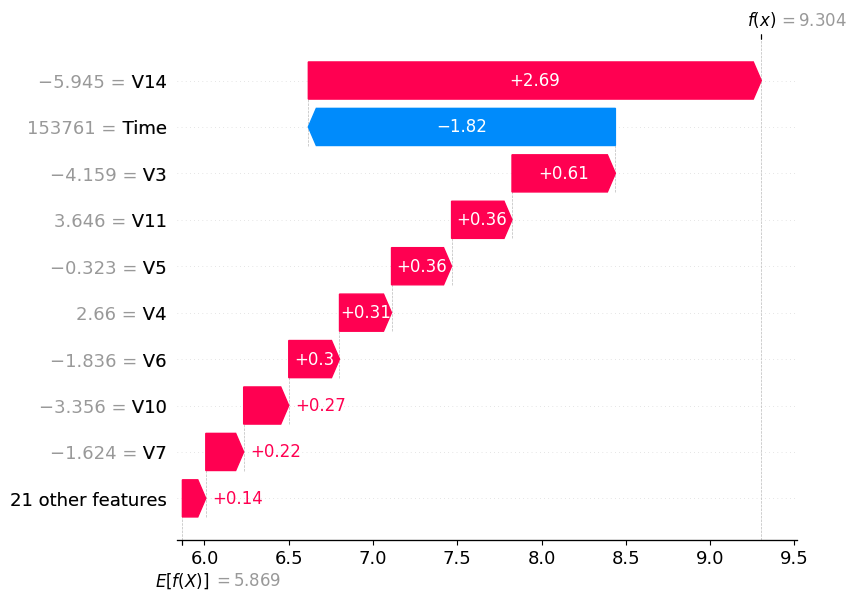

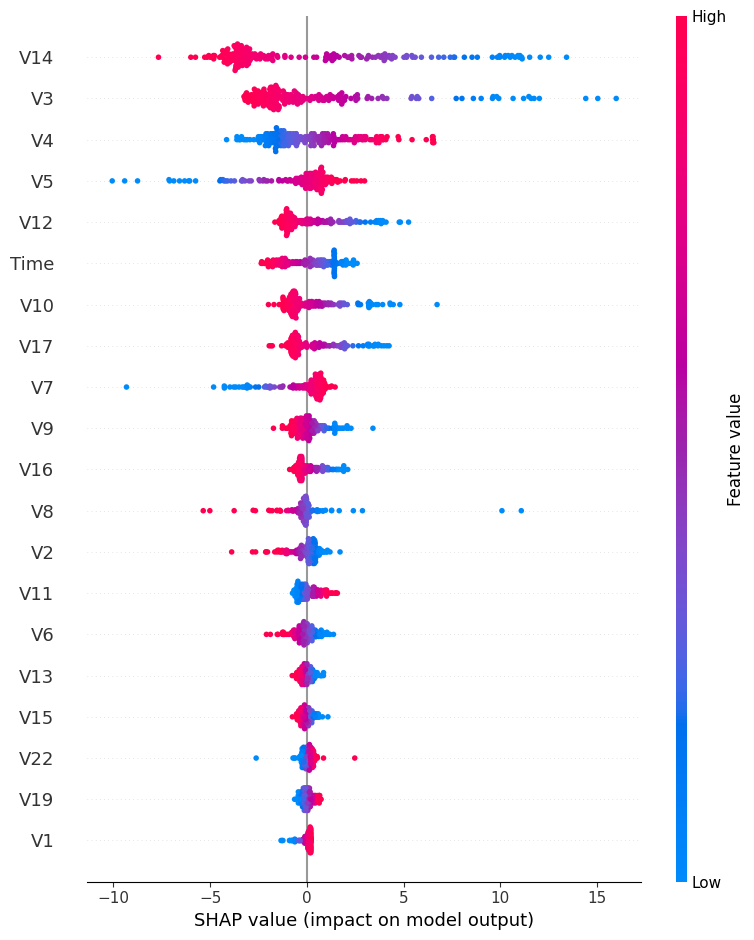

In [ ]:
import shap

# Create an explainer for your logistic regression model
explainer = shap.Explainer(log_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for a single prediction (e.g., the first instance)
shap.plots.waterfall(shap_values[0])

# Summary plot for overall feature importance across all test data
shap.summary_plot(shap_values, X_test)


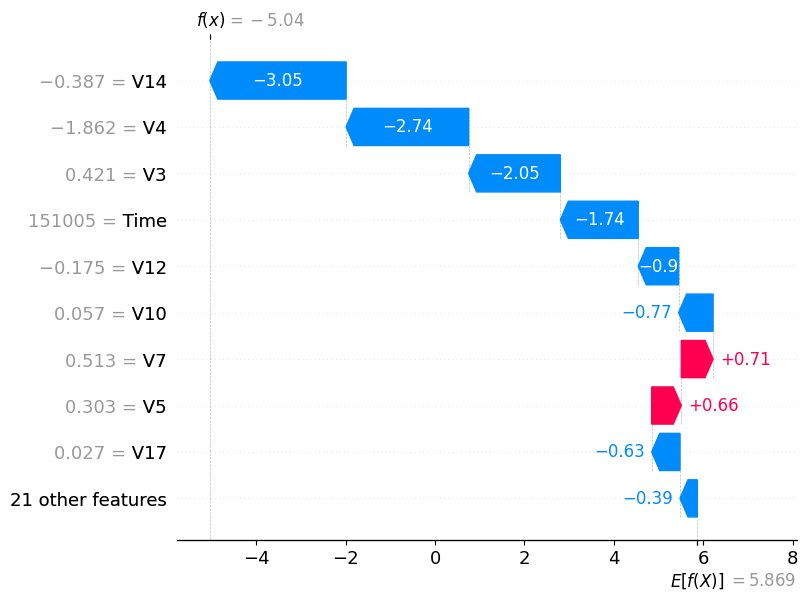

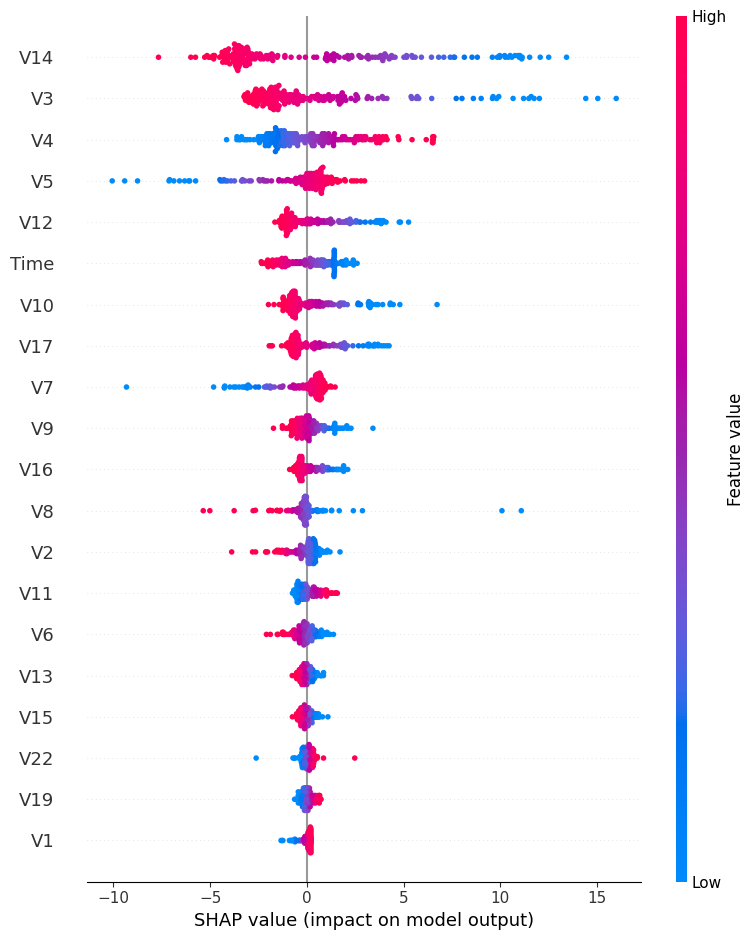

In [ ]:
import shap

# Create an explainer for your logistic regression model
explainer = shap.Explainer(log_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for a single prediction (e.g., the first instance)
shap.plots.waterfall(shap_values[1])

# Summary plot for overall feature importance across all test data
shap.summary_plot(shap_values, X_test)


## Using LIME

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c173ce2b440706239545bfc995c3881b889f310a0d1ab05a404cfdadb8987701
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Legit', 'Fraud'], mode='classification')

# Explain a specific prediction (e.g., the first instance in the test set)
exp = explainer.explain_instance(X_test.iloc[0].values, log_model.predict_proba, num_features=10)

# Visualize the explanation in the notebook
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Legit', 'Fraud'], mode='classification')

# Explain a specific prediction (e.g., the first instance in the test set)
exp = explainer.explain_instance(X_test.iloc[1].values, log_model.predict_proba, num_features=10)

# Visualize the explanation in the notebook
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
